<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

In [13]:
https://app.jedha.co/course/projects-supervised-machine-learning-pt/walmart-sales-pt


SyntaxError: invalid syntax (217776850.py, line 1)

In [14]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE

1 description du DATASET

In [15]:
df = pd.read_csv("Walmart_Store_sales.csv")
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
8,14.0,10-12-2010,2600519.26,0.0,30.54,3.109,NaN,NaN
9,3.0,NaN,418925.47,0.0,60.12,3.555,224.132020,6.833


In [16]:
df.shape

(150, 8)

In [17]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 150

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [18]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [19]:
# convert all observations of Date to datetime
df.loc[:,'Date'] = pd.to_datetime(df['Date'])

# sort values by date
df = df.sort_values(by = 'Date')
df.head()

/tmp/ipykernel_324/2410702218.py:2: UserWarning:

Parsing '18-02-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/tmp/ipykernel_324/2410702218.py:2: UserWarning:

Parsing '25-03-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/tmp/ipykernel_324/2410702218.py:2: UserWarning:

Parsing '27-07-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/tmp/ipykernel_324/2410702218.py:2: UserWarning:

Parsing '28-05-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/tmp/ipykernel_324/2410702218.py:2: UserWarning:

Parsing '19-08-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/tmp/ipykernel_324/2410702218.py:2: UserWarning:

Parsing '15-10-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
14,17.0,2010-01-10,829207.27,0.0,60.07,2.853,126.234600,6.885
20,7.0,2010-02-04,561145.14,0.0,38.26,2.725,189.704822,8.963
99,13.0,2010-02-07,2018314.71,0.0,78.82,2.814,126.139200,7.951
47,19.0,2010-02-07,1549018.68,0.0,66.25,2.958,132.521867,8.099
115,15.0,2010-02-19,660838.75,0.0,NaN,2.909,131.637000,NaN


In [20]:
###Create new columns in the dataset:Month Year day day of week

df.loc[:, 'Year'] = df['Date'].dt.year
df.loc[:, 'Month'] = df['Date'].dt.month
df.loc[:, 'Day'] = df['Date'].dt.day
df.loc[:, 'Day_of_week'] = df['Date'].dt.day_of_week
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week
14,17.0,2010-01-10,829207.27,0.0,60.07,2.853,126.234600,6.885,2010.0,1.0,10.0,6.0
20,7.0,2010-02-04,561145.14,0.0,38.26,2.725,189.704822,8.963,2010.0,2.0,4.0,3.0
99,13.0,2010-02-07,2018314.71,0.0,78.82,2.814,126.139200,7.951,2010.0,2.0,7.0,6.0
47,19.0,2010-02-07,1549018.68,0.0,66.25,2.958,132.521867,8.099,2010.0,2.0,7.0,6.0
115,15.0,2010-02-19,660838.75,0.0,NaN,2.909,131.637000,NaN,2010.0,2.0,19.0,4.0


##2 EDA

2.1 les observations

In [21]:
# put all year in an array
all_year = df.Year.unique()
all_year



array([2010., 2011., 2012.,   nan])

In [22]:
# extract last 3 year in the dataset


In [23]:
# extract last 3 year in the dataset
last_years = all_year[:]

fig = go.Figure()

for i in range(len(last_years)):
    if i == 0:
        fig.add_trace(
            go.Histogram(
                x = df.loc[df['Year']==last_years[i], 'Date'],
                nbinsx = df.loc[df['Year']==last_years[i], 'Date'].nunique(),
                visible=True))
    else:
        fig.add_trace(
            go.Histogram(
                x = df.loc[df['Year']==last_years[i], 'Date'],
                nbinsx = df.loc[df['Year']==last_years[i], 'Date'].nunique(),
                visible=False))


fig.update_layout(
        title = go.layout.Title(text = "Daily observations for one year", x = 0.5),
        showlegend = False)

# update for each year
fig.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [ 
                    go.layout.updatemenu.Button(
                        label = "2010",
                        method = "update",
                        args = [{"visible" : [True, False, False, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "2011",
                            method = "update",
                            args = [{"visible" : [False, True, False, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "2012",
                            method = "update",
                            args = [{"visible" : [False, False, True, False, False]}]),
                  
                ]
    )]
)

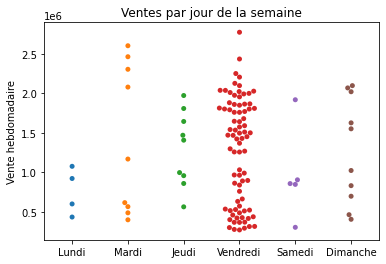

In [24]:
ax = sns.swarmplot(x= "Day_of_week", y= "Weekly_Sales",  data=df)
ax.set(xlabel='', ylabel='Vente hebdomadaire', title='Ventes par jour de la semaine')
ax.set_xticklabels(['Lundi', 'Mardi', 'Jeudi','Vendredi', 'Samedi', 'Dimanche']);

2.2 Les ventes hebdomadaires

In [35]:
# Visualize average Weekly per store vs store
mean_Weekly_Sales_per_Store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
mean_Weekly_Sales_per_Store.head

<bound method NDFrame.head of     Store  Weekly_Sales
0     1.0  1.562508e+06
1     2.0  1.943034e+06
2     3.0  4.030549e+05
3     4.0  2.173759e+06
4     5.0  3.024997e+05
5     6.0  1.551124e+06
6     7.0  5.591300e+05
7     8.0  8.887541e+05
8     9.0  5.068874e+05
9    10.0  1.822106e+06
10   11.0  1.523747e+06
11   12.0  1.028025e+06
12   13.0  1.997235e+06
13   14.0  2.092878e+06
14   15.0  6.335804e+05
15   16.0  5.153178e+05
16   17.0  8.916060e+05
17   18.0  1.140437e+06
18   19.0  1.400615e+06
19   20.0  1.962384e+06>

In [36]:
fig = px.bar(mean_Weekly_Sales_per_Store, x='Store', y='Weekly_Sales')
fig.update_layout(xaxis={"dtick":1})

2.3 EDA sur les températures

In [37]:
mean_temperature_per_store = df.groupby('Store')['Temperature'].mean().reset_index()
mean_temperature_per_store.head

<bound method NDFrame.head of     Store  Temperature
0     1.0    67.776667
1     2.0    57.462500
2     3.0    70.322143
3     4.0    65.624000
4     5.0    72.720000
5     6.0    70.266000
6     7.0    39.967500
7     8.0    70.488750
8     9.0    74.120000
9    10.0    73.336000
10   11.0    69.080000
11   12.0    73.960000
12   13.0    57.798889
13   14.0    45.806250
14   15.0    65.730000
15   16.0    51.343333
16   17.0    55.232000
17   18.0    54.215556
18   19.0    53.756250
19   20.0    54.280000>

In [40]:
px.bar(mean_temperature_per_store, x='Store', y='Temperature',)


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Temperature'>

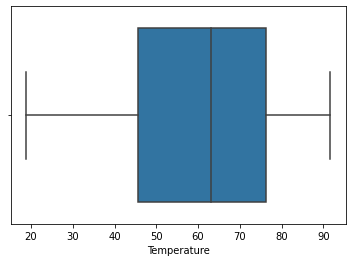

In [19]:
#to see outliers cleraly
sns.boxplot(df['Temperature'])

2.4 EDA sur le CPI

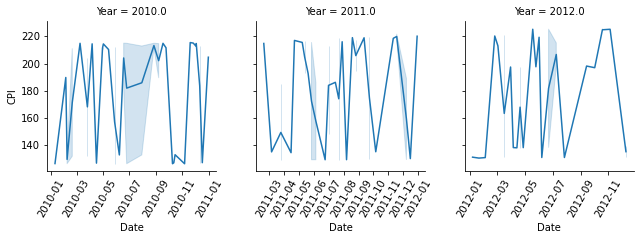

In [22]:
g = sns.FacetGrid(df, col='Year', sharex=False)
g.map(sns.lineplot, 'Date', 'CPI')
g.set_xticklabels(rotation=60)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='CPI'>

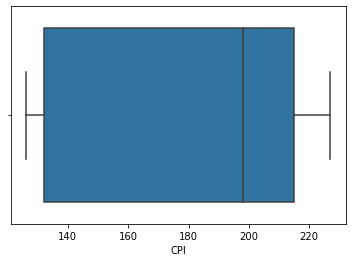

In [134]:
sns.boxplot(df['CPI'])

In [33]:
# Visualize average 
mean_Store_per_CPI = df.groupby('Store')['CPI'].mean().reset_index()
mean_Store_per_CPI.head

<bound method NDFrame.head of     Store         CPI
0     1.0  216.368313
1     2.0  214.769437
2     3.0  220.115306
3     4.0  128.196148
4     5.0  216.905432
5     6.0  215.902088
6     7.0  195.319489
7     8.0  216.373831
8     9.0  215.001735
9    10.0  128.162431
10   11.0  217.844972
11   12.0  128.060487
12   13.0  129.041653
13   14.0  185.325833
14   15.0  134.987597
15   16.0  194.473622
16   17.0  128.331461
17   18.0  134.888911
18   19.0  135.319093
19   20.0  209.187937>

In [34]:
fig=px.bar(mean_Store_per_CPI, x='Store', y='CPI',)
fig.update_layout(xaxis={"dtick":1})

2.5 le TAUX DE CHOMAGE

In [42]:
# Visualize average 
mean__Unemployment_per_Store = df.groupby('Store')['Unemployment'].mean().reset_index()
mean__Unemployment_per_Store.head

<bound method NDFrame.head of     Store  Unemployment
0     1.0      7.712000
1     2.0      7.612833
2     3.0      7.058929
3     4.0      6.272857
4     5.0      6.280875
5     6.0      6.732000
6     7.0      8.355429
7     8.0      6.341857
8     9.0      6.462000
9    10.0      8.436400
10   11.0      7.247667
11   12.0     13.893600
12   13.0      7.010444
13   14.0      8.633429
14   15.0      7.802333
15   16.0      6.357500
16   17.0      6.192333
17   18.0      8.905889
18   19.0      8.064111
19   20.0      7.496000>

In [43]:
fig=px.bar(mean__Unemployment_per_Store, x='Store', y='Unemployment',)
fig.update_layout(xaxis={"dtick":1})

2.5 Les corrélations des variables

In [31]:
correlation = df.iloc[:,1:].corr()
correlation

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week
Weekly_Sales,1.000000,0.037037,-0.165991,-0.019087,-0.287227,0.055191,-0.037837,-0.049126,-0.015375,0.025520
Holiday_Flag,0.037037,1.000000,-0.187922,-0.117447,0.171969,0.096934,0.008307,0.303578,-0.127441,-0.285289
Temperature,-0.165991,-0.187922,1.000000,0.048943,0.137936,-0.030122,-0.137289,0.055604,0.180895,0.171128
Fuel_Price,-0.019087,-0.117447,0.048943,1.000000,-0.159881,0.086241,0.810191,-0.156432,0.002241,0.045693
CPI,-0.287227,0.171969,0.137936,-0.159881,1.000000,-0.348072,-0.006642,0.157679,0.105207,-0.087226
Unemployment,0.055191,0.096934,-0.030122,0.086241,-0.348072,1.000000,-0.182377,0.018774,-0.072157,0.076401
Year,-0.037837,0.008307,-0.137289,0.810191,-0.006642,-0.182377,1.000000,-0.150667,-0.127009,-0.138505
Month,-0.049126,0.303578,0.055604,-0.156432,0.157679,0.018774,-0.150667,1.000000,-0.142434,-0.261651
Day,-0.015375,-0.127441,0.180895,0.002241,0.105207,-0.072157,-0.127009,-0.142434,1.000000,0.191885
Day_of_week,0.025520,-0.285289,0.171128,0.045693,-0.087226,0.076401,-0.138505,-0.261651,0.191885,1.000000


In [30]:
abs(correlation['Weekly_Sales']).sort_values(ascending = False)

Weekly_Sales    1.000000
CPI             0.287227
Temperature     0.165991
Unemployment    0.055191
Month           0.049126
Year            0.037837
Holiday_Flag    0.037037
Day_of_week     0.025520
Fuel_Price      0.019087
Day             0.015375
Name: Weekly_Sales, dtype: float64

## Partie 2  : Modèle de base (régression linéaire)

In [44]:
##réindaxation des colonnes
print(df)
print('Rearranging ..................')
print('..............................')
df = df.reindex(columns=['Store', 'Date', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'Day_of_week','Weekly_Sales'])
print(df)

     Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
14    17.0 2010-01-10     829207.27           0.0        60.07       2.853   
20     7.0 2010-02-04     561145.14           0.0        38.26       2.725   
99    13.0 2010-02-07    2018314.71           0.0        78.82       2.814   
47    19.0 2010-02-07    1549018.68           0.0        66.25       2.958   
115   15.0 2010-02-19     660838.75           0.0          NaN       2.909   
..     ...        ...           ...           ...          ...         ...   
92     3.0        NaT     384200.69           0.0          NaN       2.667   
102   18.0        NaT    1087051.26           0.0        69.75       3.815   
129   18.0        NaT    1048134.24           0.0        73.25       3.840   
137   10.0        NaT    1831676.03           0.0        88.44       3.112   
146    7.0        NaT     716388.81           NaN        20.74       2.778   

            CPI  Unemployment    Year  Month   Day  Day_of_week

In [45]:
##Suppréssion des valeurs manquantes pour les ventes hebdomadaires

In [49]:
print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Percentage of missing values: 


Store            0.000000
Date            12.000000
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
Year            12.000000
Month           12.000000
Day             12.000000
Day_of_week     12.000000
Weekly_Sales     9.333333
dtype: float64

In [50]:
print(df.iloc[:-1].isnull())

     Store   Date  Holiday_Flag  Temperature  Fuel_Price    CPI  Unemployment  \
14   False  False         False        False       False  False         False   
20   False  False         False        False       False  False         False   
99   False  False         False        False       False  False         False   
47   False  False         False        False       False  False         False   
115  False  False         False         True       False  False          True   
..     ...    ...           ...          ...         ...    ...           ...   
91   False   True         False        False       False   True         False   
92   False   True         False         True       False  False          True   
102  False   True         False        False       False  False         False   
129  False   True         False        False       False  False         False   
137  False   True         False        False       False  False         False   

      Year  Month    Day  D

In [51]:
index_with_nan = df.index[df.iloc[:,-1].isnull()]

df.drop(index_with_nan,0, inplace=True)

print(df)

     Store       Date  Holiday_Flag  Temperature  Fuel_Price         CPI  \
14    17.0 2010-01-10           0.0        60.07       2.853  126.234600   
20     7.0 2010-02-04           0.0        38.26       2.725  189.704822   
99    13.0 2010-02-07           0.0        78.82       2.814  126.139200   
47    19.0 2010-02-07           0.0        66.25       2.958  132.521867   
115   15.0 2010-02-19           0.0          NaN       2.909  131.637000   
..     ...        ...           ...          ...         ...         ...   
92     3.0        NaT           0.0          NaN       2.667  214.702765   
102   18.0        NaT           0.0        69.75       3.815  135.446800   
129   18.0        NaT           0.0        73.25       3.840  138.185710   
137   10.0        NaT           0.0        88.44       3.112  126.128355   
146    7.0        NaT           NaN        20.74       2.778         NaN   

     Unemployment    Year  Month   Day  Day_of_week  Weekly_Sales  
14          6.885  

/tmp/ipykernel_48/803253076.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [52]:
print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Percentage of missing values: 


Store            0.000000
Date            13.235294
Holiday_Flag     8.088235
Temperature     11.029412
Fuel_Price       8.823529
CPI              8.088235
Unemployment    10.294118
Year            13.235294
Month           13.235294
Day             13.235294
Day_of_week     13.235294
Weekly_Sales     0.000000
dtype: float64

In [53]:
df.shape


(136, 12)

In [ ]:
##Suppréssion  des valeurs aberrantes en utilisant Z-score: 

In [112]:
df_clean = df.copy()

In [113]:
#Supprimer les valeurs aberrantes pour le taux de chomage
upper_bound3=df["Unemployment"].mean()+df["Unemployment"].std()*3
upper_bound3

12.523867092274017

In [114]:
lower_bound3=df["Unemployment"].mean()-df["Unemployment"].std()*3
lower_bound3

2.807296842152211

In [115]:
mask3=(((df_clean["Unemployment"] < upper_bound3) & (df_clean["Unemployment"] > lower_bound3)) | df_clean["Unemployment"].isna())
df_clean = df_clean[mask3]

In [116]:
#Supprimer les valeurs aberrantes pour Fuel_Price 
upper_bound1=df["Fuel_Price"].mean()+df["Fuel_Price"].std()*3
upper_bound1

4.755612641575396

In [117]:
lower_bound1=df["Fuel_Price"].mean()-df["Fuel_Price"].std()*3
lower_bound1

1.878371229392345

In [118]:
mask1=(((df_clean["Fuel_Price"] < upper_bound1) & (df_clean["Fuel_Price"] > lower_bound1)) | df_clean["Fuel_Price"].isna())
df_clean = df_clean[mask1]

In [119]:
#Supprimer les valeurs aberrantes pour CPI 
upper_bound2=df["CPI"].mean()+df["CPI"].std()*3
upper_bound2

298.82045814693976

In [120]:
lower_bound2=df["CPI"].mean()-df["CPI"].std()*3
lower_bound2

57.36182994106019

In [121]:
mask2=(((df_clean["CPI"] < upper_bound2) & (df_clean["CPI"] > lower_bound2)) | df_clean["CPI"].isna())
df_clean = df_clean[mask2]

In [122]:
#Supprimer les valeurs aberrantes pour les températures
upper_bound=df["Temperature"].mean()+df["Temperature"].std()*3
upper_bound

116.39726255188086

In [123]:
lower_bound=df["Temperature"].mean()-df["Temperature"].std()*3
lower_bound

5.310671332416689

In [124]:
mask=(((df_clean["Temperature"] < upper_bound) & (df_clean["Temperature"] > lower_bound)) | df_clean["Temperature"].isna())
df_clean = df_clean[mask]

In [125]:
df_clean.shape

(131, 12)

In [126]:
df.shape

(136, 12)

In [130]:
df_clean.drop(columns=["Date"],inplace=True)

In [131]:
df_clean.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week,Weekly_Sales
14,17.0,0.0,60.07,2.853,126.234600,6.885,2010.0,1.0,10.0,6.0,829207.27
20,7.0,0.0,38.26,2.725,189.704822,8.963,2010.0,2.0,4.0,3.0,561145.14
99,13.0,0.0,78.82,2.814,126.139200,7.951,2010.0,2.0,7.0,6.0,2018314.71
47,19.0,0.0,66.25,2.958,132.521867,8.099,2010.0,2.0,7.0,6.0,1549018.68
115,15.0,0.0,NaN,2.909,131.637000,NaN,2010.0,2.0,19.0,4.0,660838.75


3 . Le modèle de régression linéaire

In [132]:
X=df_clean.iloc[: ,:-1]
Y=df_clean.iloc[:, -1:]

In [133]:
#Séparer la variable cible Y des entités X
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [134]:
# Create pipeline for numeric features
numeric_features = [2,3,4,5,6,7,8,9] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler())
])

In [135]:
categorical_features = [0,1] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [166]:
preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out()

array(['x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0', 'x0_6.0', 'x0_7.0',
       'x0_8.0', 'x0_9.0', 'x0_10.0', 'x0_11.0', 'x0_13.0', 'x0_14.0',
       'x0_15.0', 'x0_16.0', 'x0_17.0', 'x0_18.0', 'x0_19.0', 'x0_20.0',
       'x1_1.0'], dtype=object)

In [136]:
# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessings on train set
print("Performing preprocessings on train set...")
#print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
#print(X_test[0:5,:])
X_test = preprocessor.transform(X_test) # Don't fit again !!
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
...Done.
[[-1.00772439e+00 -3.34059067e-02 -1.36236220e+00  1.43651231e+00
   0.00000000e+00 -2.90069308e-16  4.69874694e-16 -3.86390309e-16
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.64648071e+00  8.26396385e-01  9.64783677e-01 -8.95564071e-01
   1.81075060e-01  6.00623461e-02  1.79232351e+00  2.40020310e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.03876643e+00 -1.18271125e+00  8.69619315e-01 -3.02

In [137]:
# This will create an AttributeError because X_train is not a pandas DataFrame anymore !
X_train


array([[-1.00772439e+00, -3.34059067e-02, -1.36236220e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.64648071e+00,  8.26396385e-01,  9.64783677e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.03876643e+00, -1.18271125e+00,  8.69619315e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.26673142e+00,  7.06677078e-01, -1.31105506e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.10073092e-16,  9.30878689e-01,  1.13220836e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.93285828e+00, -3.55559677e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [138]:
# Actually, X_train is a numpy array 
type(X_train)


numpy.ndarray

In [139]:
# Numpy syntax to display 5 first lines
X_train[0:5]


array([[-1.00772439e+00, -3.34059067e-02, -1.36236220e+00,
         1.43651231e+00,  0.00000000e+00, -2.90069308e-16,
         4.69874694e-16, -3.86390309e-16,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.64648071e+00,  8.26396385e-01,  9.64783677e-01,
        -8.95564071e-01,  1.81075060e-01,  6.00623461e-02,
         1.79232351e+00,  2.40020310e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+

In [140]:
# Train model
model = LinearRegression()

print("Training model...")
model.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")


Training model...
...Done.


In [141]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()


Predictions on training set...
...Done.
[[1905425.14527985]
 [ 234114.40241882]
 [1603461.64754518]
 [ 507233.23935647]
 [ 869818.92779258]]



In [142]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()


Predictions on test set...
...Done.
[[ 438006.12156809]
 [2024587.62012664]
 [1458116.36310634]
 [ 650722.91265248]
 [1635383.22362284]]



In [143]:
 #Print R2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9653964087352943
R2 score on test set :  0.9418016237917336


#Training _Machine Learning


In [ ]:
#Comment interprèter le modèle en fonction des coefficients

In [147]:
regressor.coef_

array([[  -46797.61745467,    -4315.4046754 ,    34443.69651291,
          -82990.26426875,   -50063.44221956,    37078.78008677,
           -3427.65880678,   -14873.20691794,   373110.03815068,
        -1173821.46339035,   548254.51078328, -1333003.97139198,
            9747.25049453,  -941967.55447926,  -836866.47841798,
        -1162967.15465248,   467529.49574193,  -189207.06945022,
          496248.81913545,   612163.95623508,  -823026.60785441,
        -1107598.81986108,  -738862.23630261,  -297601.2513867 ,
          -27239.24561148,   481151.42341074,   -24139.12130407]])

4combattre le surentraînement 

In [188]:
from sklearn.linear_model import Ridge

In [190]:
#Model Ridge
regressor = Ridge()
regressor.fit(X_train, Y_train)
regressor

Ridge()

In [192]:
r2_score_train = regressor.score(X_train, Y_train)
r2_score_test = regressor.score(X_test, Y_test)
print("R2 on train: ", r2_score_train)
print("R2 on test: ", r2_score_test) 

R2 on train:  0.9270696598634236
R2 on test:  0.9025367857579697


In [ ]:
regressor.coef_

In [ ]:
#Grid Search

In [193]:
regressor = Ridge()
regressor

Ridge()

In [ ]:
params= {
    "alpha":[0.001,0.03,0.06,0.08,0.1]
}
optimized_regressor = GridSearchCV(regressor,params,cv=2)
optimized_regressor.fit(X_train,Y_train)

NameError: name 'regressor' is not defined

In [210]:
optimized_regressor.score(X_test, Y_test)

0.9412711364018167

In [211]:
print("Optimized estimator", optimized_regressor.best_estimator_)
print("Best Parameters", optimized_regressor.best_params_)

Optimized estimator Ridge(alpha=0.03)
Best Parameters {'alpha': 0.03}


In [212]:
r2_score_train = optimized_regressor.score(X_train, Y_train)
r2_score_test = optimized_regressor.score(X_test, Y_test)
print("R2 on train: ", r2_score_train)
print("R2 on test: ", r2_score_test) 

R2 on train:  0.9652347533660777
R2 on test:  0.9412711364018167


Comment determiner le meilleur paramètre : la CV cross validation; Par défault, il est toujours à 5.

#model lasso
Utilisez la fonction GridSearchCV afin de rechercher le meilleur paramètre de pénalisation pour le modèle LASSO. 

In [46]:
params = {'alpha' : [20, 200, 300, 400, 500]}
lasso = Lasso()
grid = GridSearchCV(lasso,param_grid=params, cv = 3, verbose=1)

grid.fit(X_train,Y_train)

NameError: name 'X_train' is not defined

In [206]:
grid.best_params_

{'alpha': 100}

In [208]:
r2_score_train = grid.score(X_train, Y_train)
r2_score_test = grid.score(X_test, Y_test)
print("R2 on train: ", r2_score_train)
print("R2 on test: ", r2_score_test) 

R2 on train:  0.9653745348334954
R2 on test:  0.9423539526431669
